In [4]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import soundfile
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

import build
from dct import isdct, sdct
from models import *
from train import generate

In [2]:
class DaNet(pl.LightningModule):
    def __init__(self, model_loader, noise=0.0):
        super().__init__()
        self.save_hyperparameters()
        self.model = eval(model_loader)
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        x, aux = batch
        x += torch.randn_like(x) * self.noise
        x_hat = self.forward(x)
        loss = F.mse_loss(x_hat, x)
        self.log("train_loss", loss)
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters())
        return optimizer

In [3]:
model = DaNet.load_from_checkpoint('lightning_logs/version_2/checkpoints/epoch=35-step=360.ckpt')

In [7]:
x = generate(model, 1000, show_progress=True)

100%|██████████| 1000/1000 [00:07<00:00, 134.64it/s]


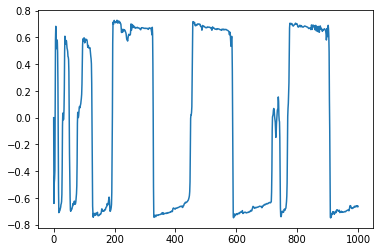

In [9]:
plt.plot(x[0])
plt.show()